In [ ]:
import numpy as np

In [ ]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

# string.ascii_letters + string.digits (Chars & Digits)
# or
# "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))

    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [ ]:
encode_to_labels("123wer")

[14, 15, 16, 74, 56, 69]

In [ ]:
import tensorflow as tf

sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence)





array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [ ]:
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    #imshow(img)

    w, h = img.shape

#     _, img = cv2.threshold(img,
#                            128,
#                            255,
#                            cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img

In [ ]:
import cv2
cv2

<module 'cv2' from '/usr/local/lib/python3.7/dist-packages/cv2/__init__.py'>

In [ ]:
Grayscale_img = cv2.imread('/content/a01-007u-00-06.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
from google.colab.patches import cv2_imshow
#cv2_imshow(Grayscale_img)

In [ ]:
Grayscale_img.shape

(60, 227)

In [ ]:
img=process_image(img)

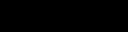

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(32, 128, 1)

In [ ]:
gray = img[:,:,0]

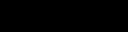

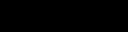

In [ ]:
#cv2.imshow('Original image',img)
cv2_imshow(img)
#cv2.imshow('Gray image', gray)
cv2_imshow( gray)

In [ ]:
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
cv2_imshow(resized)

Original Dimensions :  (60, 227)
Resized Dimensions :  (36, 136)


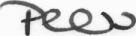

In [ ]:
import cv2

img = cv2.imread('/content/a01-007u-00-06.png', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2_imshow( resized)


In [ ]:
img = cv2.imread('/content/a01-007u-00-06.png', cv2.IMREAD_GRAYSCALE)

img = process_image(img)

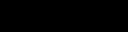

In [ ]:
cv2_imshow(img)


In [ ]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

# string.ascii_letters + string.digits (Chars & Digits)
# or
# "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))
def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))

    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [ ]:
a=encode_to_labels('z')

In [ ]:
a

[77]

In [ ]:
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

In [ ]:
import cv2
img = cv2.imread("/content/a01-007u-00-06.png", cv2.IMREAD_GRAYSCALE)
try:
    img = process_image(img)
except:
    "Error"


In [ ]:
word="w"
train_images.append(img)
train_labels.append(a)
train_input_length.append(31)
train_label_length.append(len(word))
train_original_text.append(word)

In [ ]:
import numpy as np
np.shape(train_images)

(2, 60, 227)

In [ ]:
train_labels


[[77], [77]]

In [ ]:
train_input_length

[31, 31]

In [ ]:
train_label_length


[1, 1]

In [ ]:
train_original_text

['w', 'w']

In [ ]:
from keras.preprocessing.sequence import pad_sequences
train_padded_label = pad_sequences(
                              train_labels,
                             maxlen=max_label_len,
                             padding='post',
                             value=len(char_list))

In [ ]:
train_padded_label

array([], shape=(2, 0), dtype=int32)

In [ ]:
train_padded_label.view()

array([], shape=(2, 0), dtype=int32)

In [ ]:
import os
import glob
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm.notebook as tqdm

%matplotlib inline
tqdm.tqdm.pandas()


# %pip install keras-ocr
# import keras_ocr
# detector = keras_ocr.detection.Detector()
from google.colab.patches import cv2_imshow

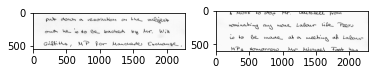

In [ ]:
def crop_and_split(img):
    if isinstance(img, str):
        img = cv2.imread(img)
        assert img is not None

    img = img[:, 200:]

    prt = img[:600]
    hand = img[650:2500]
    return hand, prt

img = cv2.imread('/content/1.png')
hand, prt = crop_and_split(img)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(hand)
ax2.imshow(prt)
plt.show()
plt.close()

In [ ]:
hand = cv2.imread('/content/1.png')


In [ ]:
hand2=hand

In [ ]:
hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)


In [ ]:
#hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
#plt.imshow(hand)
_, th = cv2.threshold(hand, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)



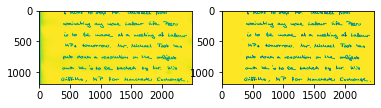

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(hand)
ax2.imshow(th)


In [ ]:
th

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
th.shape

(1193, 2479)

In [ ]:
hand = cv2.cvtColor(hand2, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(hand, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)



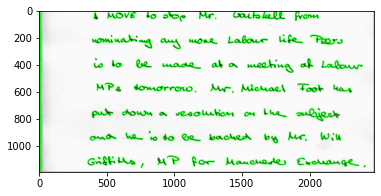

In [ ]:
chars = cv2.drawContours(hand2,contours,-1,(0,255,0),3)
plt.imshow(chars, cmap='gray')
plt.show()
plt.close()

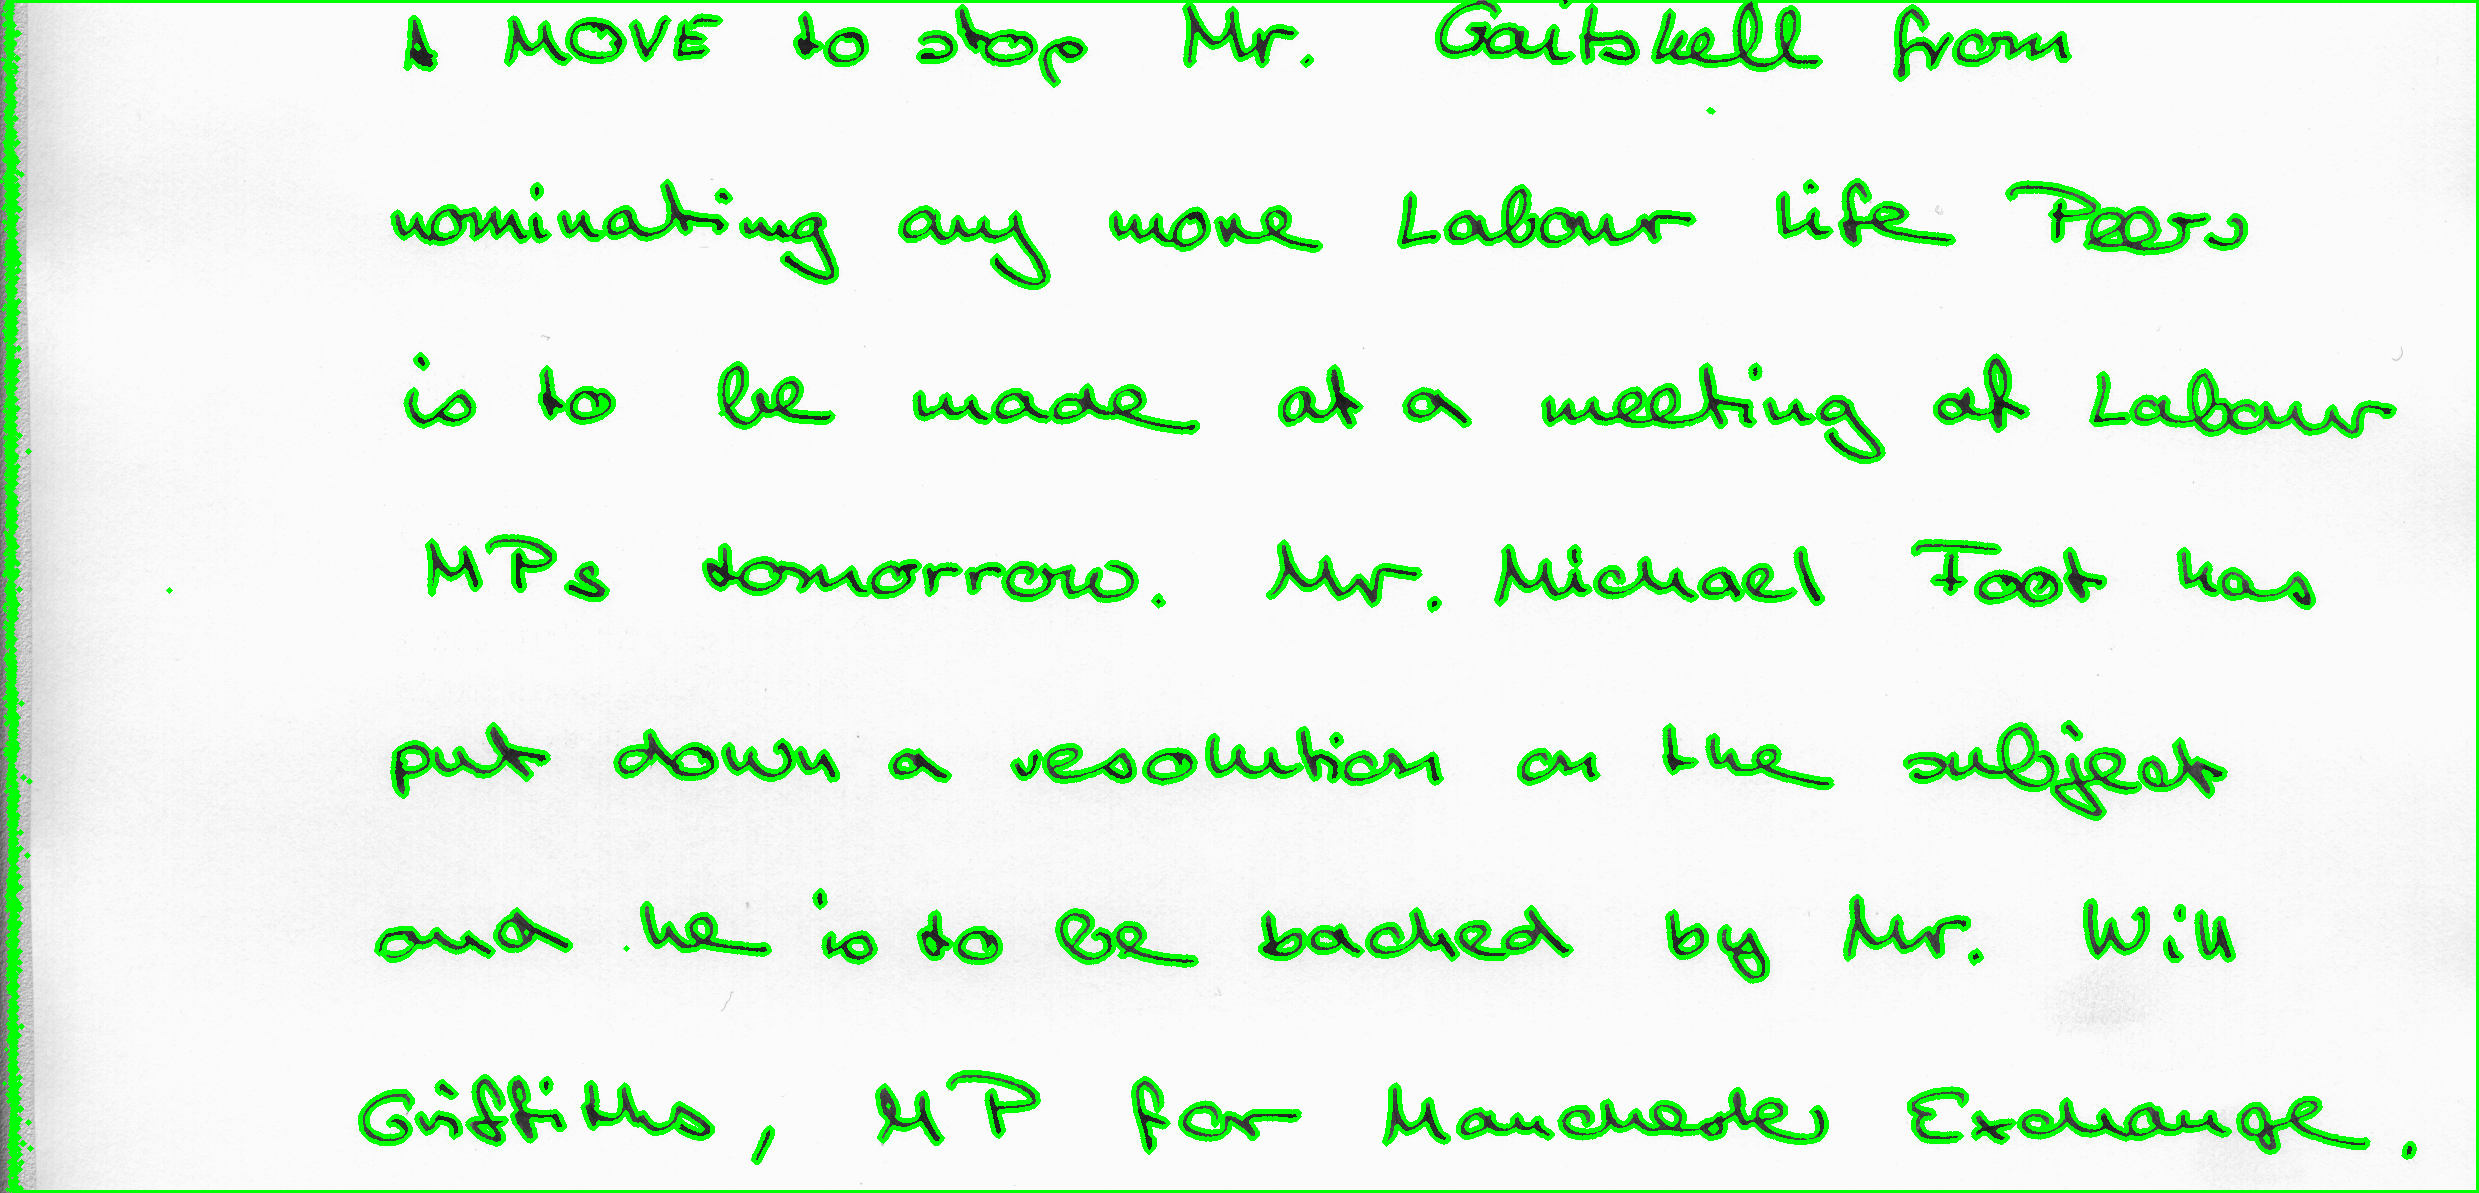

In [ ]:
cv2_imshow(chars)

In [ ]:


def extract_lines(img, warp_crop=False, padx=4, pady=4):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Finding text lines
    #Remove Noise
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    #threshold
    _, th = cv2.threshold(blur, 0, 255 , cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    block_kern_shape = (100, 1)
    block_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, block_kern_shape)
    dilation = cv2.dilate(th, block_kernel, iterations=1)
    contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    crops, chars, bboxes = [], [], []
    for ctr in contours:
        box = cv2.boundingRect(ctr)
        if warp_crop:
            rect = cv2.minAreaRect(ctr)
            crop = crop_min_area_rect(rect, img)
            if is_unwanted(crop.shape[0], crop.shape[1]):
                continue
        else:
            x, y, w, h = box
            if is_unwanted(h, w):
                continue
            crop = img[y-pady:y+h+pady, x-padx:x+w+padx]

        char = find_chars(crop)
        if len(char) < 3:
            continue

        crops.append(crop)
        chars.append(char)
        bboxes.append(box)

    # crops, chars, bboxes = filter_crops(crops, chars, bboxes)
    return crops, chars, bboxes

In [ ]:
def crop_min_area_rect(rect, img):
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Reorder points to [tl, tr, br, bl]
    box = order_points(box).astype("float32")
    w = int(np.linalg.norm(box[0] - box[1]))
    h = int(np.linalg.norm(box[0] - box[3]))

    dst_pts = np.array([
        [0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype="float32")

    M = cv2.getPerspectiveTransform(box, dst_pts)

    # directly warp the rotated rectangle to get the straightened rectangle
    warped = cv2.warpPerspective(img, M, (w, h))
    return warped

In [ ]:
def order_points(pts):
    """https://www.pyimagesearch.com/2016/03/21/ordering-coordinates-clockwise-with-python-and-opencv/"""
    x = pts[np.argsort(pts[:, 0]), :]

    left = x[:2, :]
    right = x[2:, :]

    left = left[np.argsort(left[:, 1]), :]
    (tl, bl) = left

    d = cdist(tl[np.newaxis], right, "euclidean")[0]
    (br, tr) = right[np.argsort(d)[::-1], :]
    return np.array([tl, tr, br, bl], dtype="float32")

In [ ]:

def is_unwanted(h, w):
    return any([h < 10, w < 200, w/h < 1, w/h > 100])

In [ ]:


def find_chars(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, th = cv2.threshold(img, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    contours = [c[:, 0, :] for c in contours]
    return contours





In [ ]:
blur = cv2.GaussianBlur(prt, (9, 9), 0)

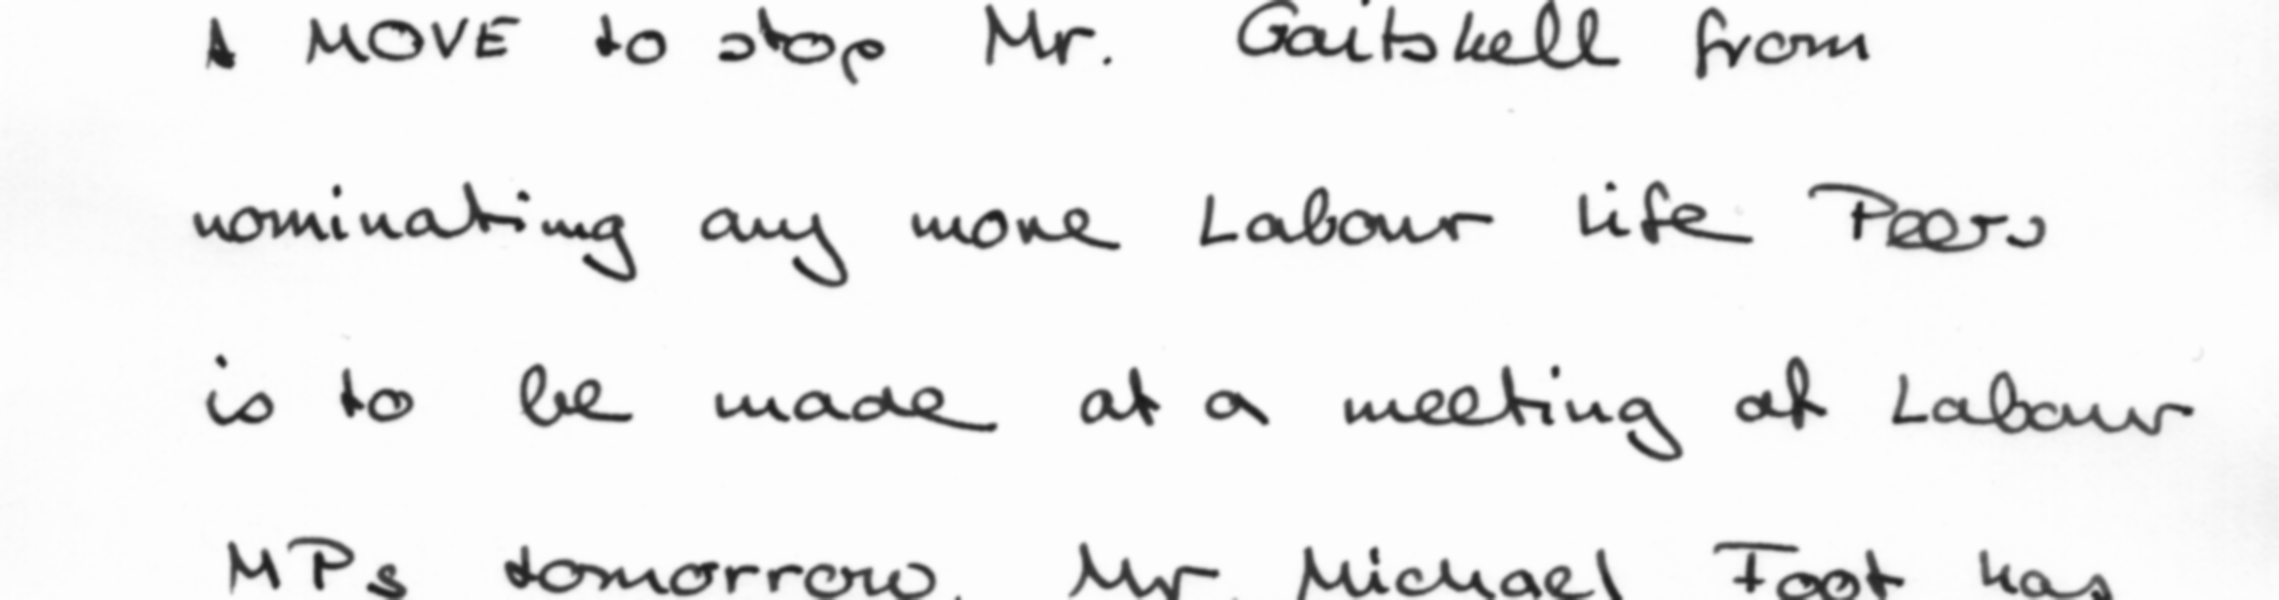

In [ ]:
cv2_imshow(blur)

In [ ]:
from scipy.spatial.distance import cdist


def crop_textblocks(images, detector):
    hands, prts = zip(*[crop_and_split(img) for img in images])
    hands = [keras_ocr.tools.warpBox(img, box) for (img, boxes) in zip(hands, detector.detect(hands)) for box in boxes]
    prts = [keras_ocr.tools.warpBox(img, box) for (img, boxes) in zip(prts, detector.detect(prts)) for box in boxes]
    crops = prts + hands
    labels = ['prt' for _ in prts] + ['hand' for _ in hands]
    return crops, labels





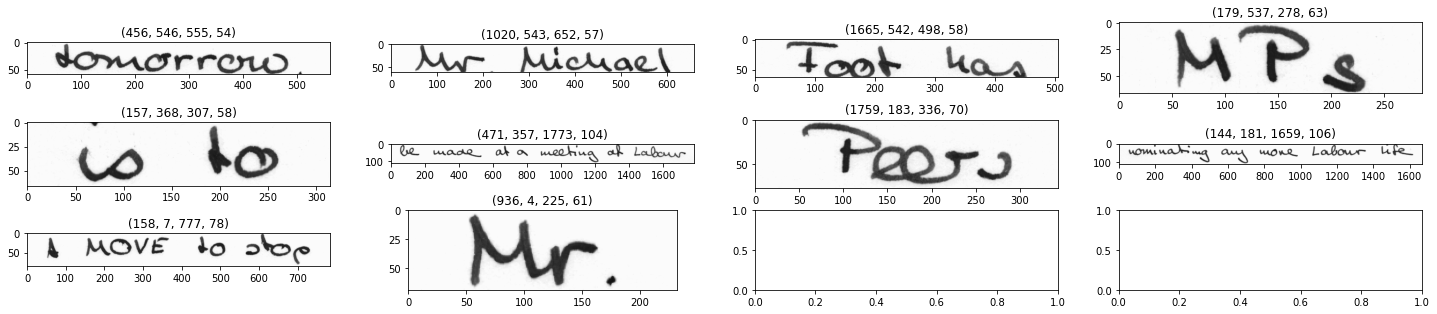

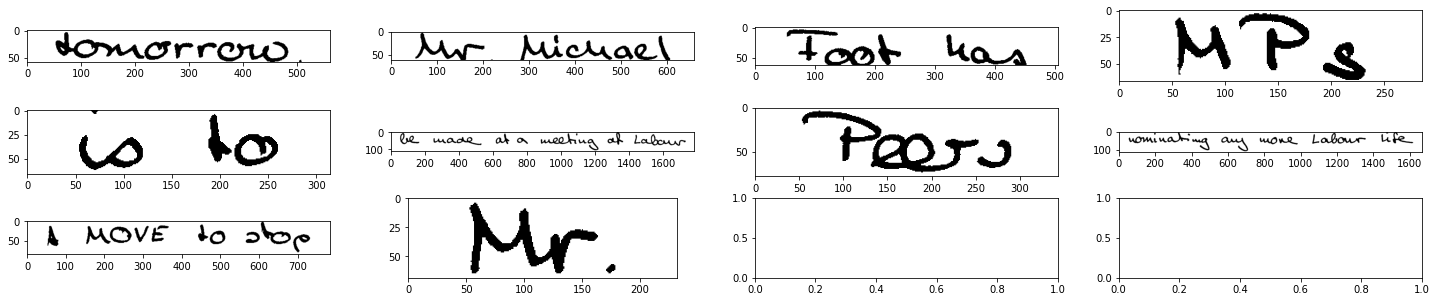

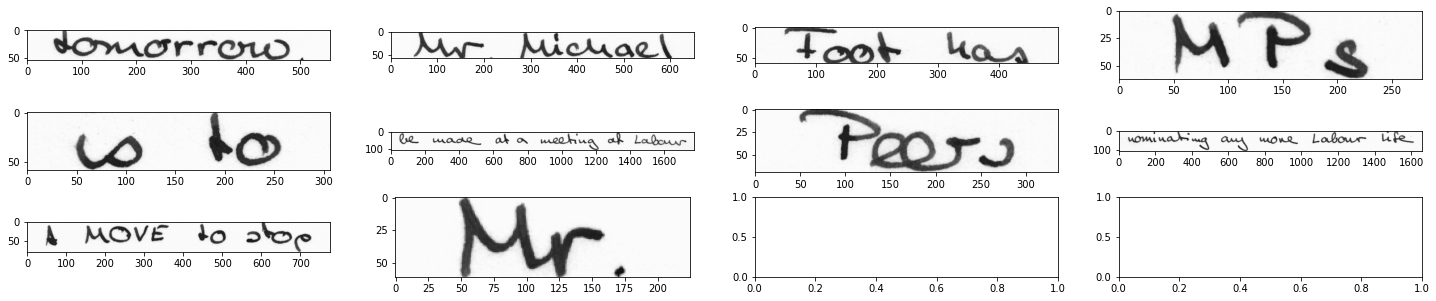

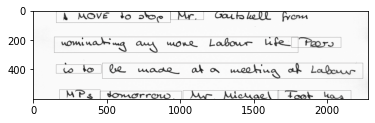

In [ ]:
img = prt.copy()
crops, contours, bboxes = extract_lines(img)

k = int(np.ceil(len(crops) / 4))
_, axs = plt.subplots(k, 4, figsize=(25, 5))
for crop, box, ax in zip(crops, bboxes, axs.flatten()):
    ax.imshow(crop, cmap='gray', vmin=0, vmax=255)
    ax.set_title(box)

plt.show()

_, axs = plt.subplots(k, 4, figsize=(25, 5))
for crop, ctrs, ax in zip(crops, contours, axs.flatten()):
    _img = cv2.drawContours(np.zeros(crop.shape[:2], dtype='uint8'), ctrs, -1, (255), -1)
    ax.imshow(_img, cmap='gray', vmin=0, vmax=255)

plt.show()

_, axs = plt.subplots(k, 4, figsize=(25, 5))
for box, ax in zip(bboxes, axs.flatten()):
    x, y, w, h = box
    ax.imshow(img[y:y+h, x:x+w])

plt.show()

_img = img.copy()
for (x, y, w, h) in bboxes:
    _img = cv2.rectangle(_img, (x, y), (x+w, y+h), 2)
plt.imshow(_img)
plt.show()

In [ ]:
import cv2
import numpy as np

def process_img(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    canny = cv2.Canny(blur, 120, 255, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(canny, kernel, iterations=5)
    img_erode = cv2.erode(dilate, kernel, iterations=1)

#    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img_canny = cv2.Canny(img_gray, 120, 225,1)
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    # img_dilate = cv2.dilate(img_canny, kernel, iterations=5)
    # img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    return img_erode

def get_centeroid(cnt):
    length = len(cnt)
    sum_x = np.sum(cnt[..., 0])
    sum_y = np.sum(cnt[..., 1])
    return int(sum_x / length), int(sum_y / length)

def get_centers(img):
    contours, hierarchies = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            yield get_centeroid(cnt)

def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]

img = cv2.imread("/content/1.png")
img_processed = process_img(img)
centers = list(get_centers(img_processed))

h, w, c = img.shape
count = 0

for row in get_rows(img, centers, 10, h):
    cv2.polylines(img, [row], False, (255, 0, 255), 2)
    for x, y in row:
        count += 1
        cv2.circle(img, (x, y), 10, (0, 0, 255), -1)
        cv2.putText(img, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (0, 255, 255), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
pip install keras-htr

In [ ]:

import keras_htr.models as k
import inspect

In [ ]:
print(inspect.getsource(k))

import tensorflow as tf


def create_conv_rnn_model(num_classes):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(10, 1), padding='valid', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Reshape((-1, 64)))
    model.add(tf.keras.layers.LSTM(units=512))
    model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

    return model


def compute_output_shape(input_shape):
    height, width, channels = input_shape

    new_width = ((width // 2 - 4) // 2 - 2) // 2
    return 

In [ ]:
tf.compat.v1.disable_eager_execution()



In [ ]:
"""Create CNN layers."""
input_imgs = tf.compat.v1.placeholder(tf.float32, shape=(None, None, None))
is_train = tf.compat.v1.placeholder(tf.bool, name='is_train')
cnn_in4d = tf.expand_dims(input=input_imgs, axis=3)

# list of parameters for the layers
kernel_vals = [5, 5, 3, 3, 3]
feature_vals = [1, 32, 64, 128, 128, 256]
stride_vals = pool_vals = [(2, 2), (2, 2), (1, 2), (1, 2), (1, 2)]
num_layers = len(stride_vals)

# create layers
pool = cnn_in4d  # input to first CNN layer
for i in range(num_layers):
    kernel = tf.Variable(
        tf.random.truncated_normal([kernel_vals[i], kernel_vals[i], feature_vals[i], feature_vals[i + 1]],
                                    stddev=0.1))
    conv = tf.nn.conv2d(input=pool, filters=kernel, padding='SAME', strides=(1, 1, 1, 1))
    conv_norm = tf.compat.v1.layers.batch_normalization(conv, training=is_train)
    relu = tf.nn.relu(conv_norm)
    pool = tf.nn.max_pool2d(input=relu, ksize=(1, pool_vals[i][0], pool_vals[i][1], 1),
                            strides=(1, stride_vals[i][0], stride_vals[i][1], 1), padding='VALID')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/normalization.py:463: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
from typing import List
char_list: List[str]

In [ ]:
rnn_in3d = tf.squeeze(pool, axis=[2])

# basic cells which is used to build RNN
num_hidden = 256
cells = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_hidden, state_is_tuple=True) for _ in
        range(2)]  # 2 layers

# stack basic cells
stacked = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells, state_is_tuple=True)

# bidirectional RNN
# BxTxF -> BxTx2H
(fw, bw), _ = tf.compat.v1.nn.bidirectional_dynamic_rnn(cell_fw=stacked, cell_bw=stacked, inputs=rnn_in3d,
                                                      dtype=rnn_in3d.dtype)

# BxTxH + BxTxH -> BxTx2H -> BxTx1X2H
concat = tf.expand_dims(tf.concat([fw, bw], 2), 2)

# project output to chars (including blank): BxTx1x2H -> BxTx1xC -> BxTxC
kernel = tf.Variable(tf.random.truncated_normal([1, 1, num_hidden * 2, 79 + 1], stddev=0.1))
rnn_out_3d = tf.squeeze(tf.nn.atrous_conv2d(value=concat, filters=kernel, rate=1, padding='SAME'),
                            axis=[2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  """
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will

In [ ]:
from tensorflow.keras.models import Model
model=Model(inputs=input_imgs,outputs=rnn_out_3d)

FailedPreconditionError: ignored